# Sobel算子、Scharr算子与Laplacian算子

# 1. Sobel算子（联合高斯平滑加微分运算，因此对噪声的抵抗能力更强）

① Sobel算子函数：cv2.Sobel(src, ddepth, dx, dy, ksize)，**返回值为Sobel算子处理后的图像**。

 - ddepth：图像的深度，通常取为-1，表示输入图像的深度和输出图像相等
 - dx 和 dy 分别表示水平和竖直方向
 - ksize 是 Sobel 算子的大小
 
② **靠近最近点的左右和上下的权重最高**，所以为±2。

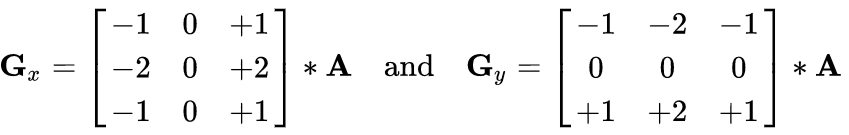

## 1.1 圆形处理(例)

In [2]:
import cv2 #opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包

# 魔法指令，直接展示图，Jupyter notebook特有
%matplotlib inline
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [3]:
pie = cv2.imread('01_Picture/06_pie.png') # 读取图像
cv_show('img',pie)

原图
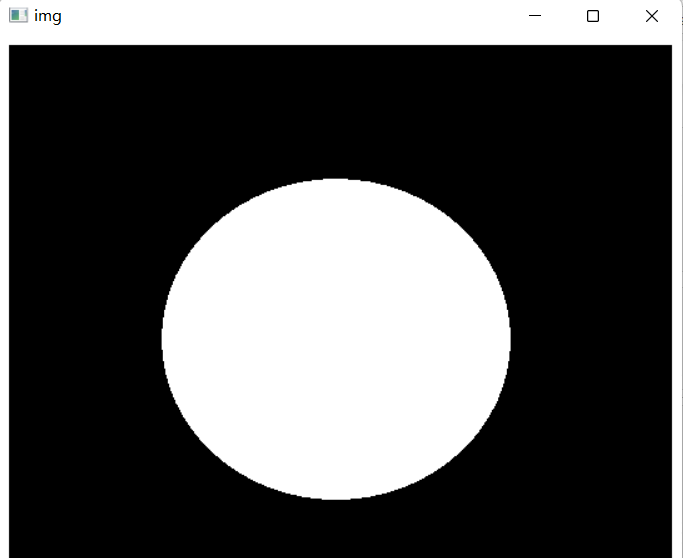

In [5]:
# 梯度就是边界点，左边右边不一样


# 白到黑是整数，黑到白是负数了，所有的负数会被截断成 0，所以要取绝对值
sobelx = cv2.Sobel(pie,cv2.CV_64F,1,0,ksize=3) # 1,0 表示只算水平方向梯度，即dx=1,dy=0（不太理解参数cv2.CV_64F）
cv_show('sobelx',sobelx)

使用Sobel算子处理后的图像
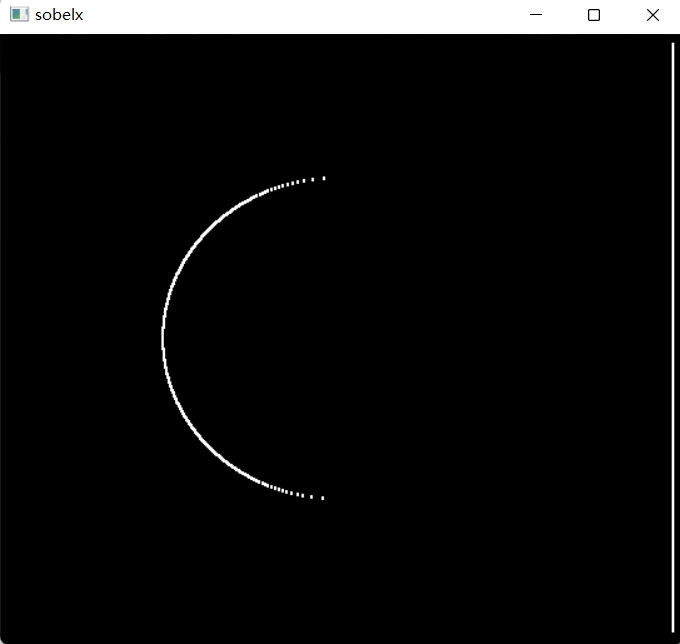

In [7]:
sobelx = cv2.Sobel(pie,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx) # 取负数时，取绝对值
cv_show('sobelx',sobelx)

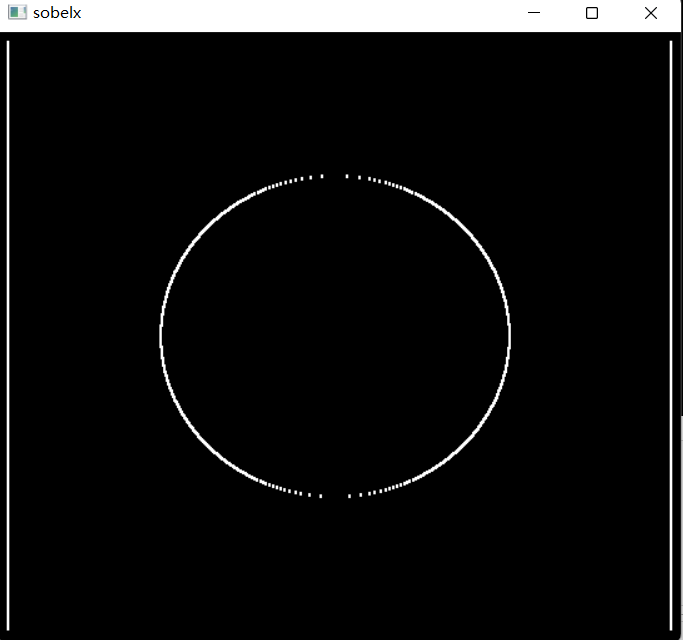

In [ ]:
sobely = cv2.Sobel(pie,cv2.CV_64F,0,1,ksize=3) # 1,0 只算 y 方向梯度
sobely = cv2.convertScaleAbs(sobely) # 取负数时，取绝对值
cv_show('sobely',sobely)

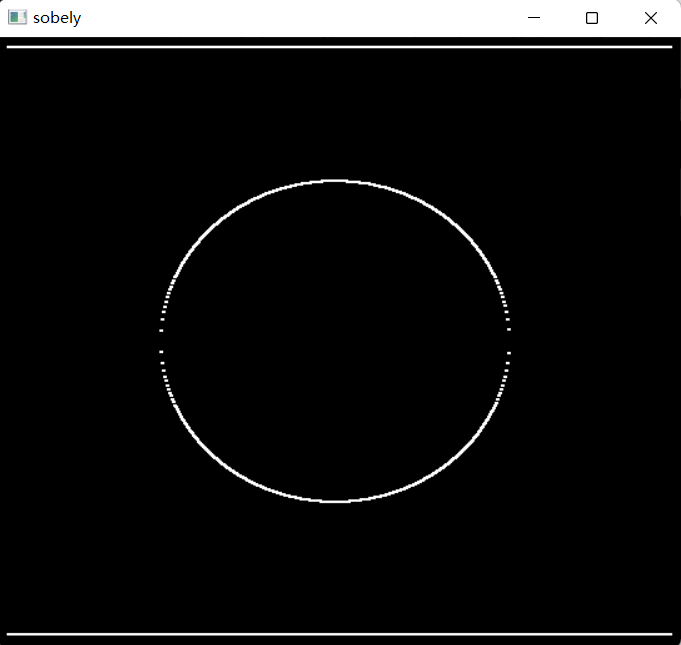

In [10]:
# 计算 x 和 y 后，再求和
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0) # 0是偏置项，0.5是权重，addWeighted是图像融合
cv_show('sobelxy',sobelxy)

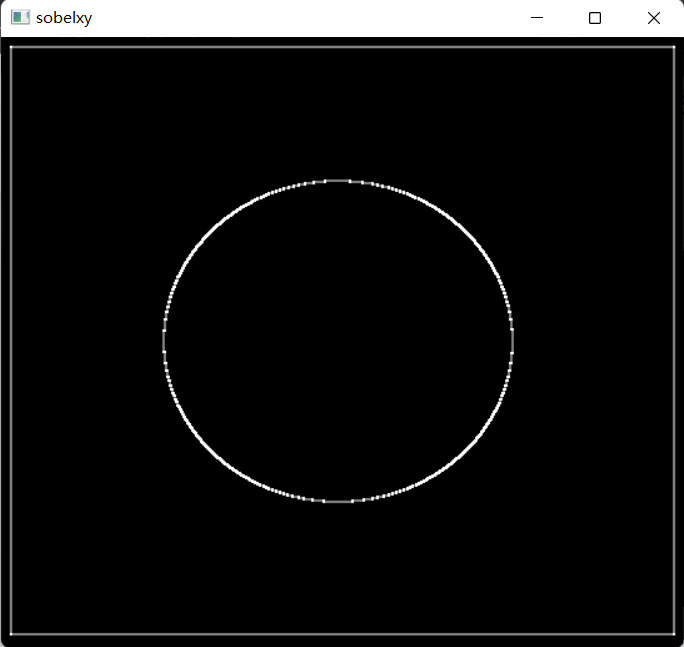

In [11]:
# 不建议直接计算,还有重影
sobelxy = cv2.Sobel(pie,cv2.CV_64F,1,1,ksize=3) # dx=1，dy=1代表x、y方向都计算梯度
sobelxy = cv2.convertScaleAbs(sobelxy)
cv_show('sobelxy',sobelxy)

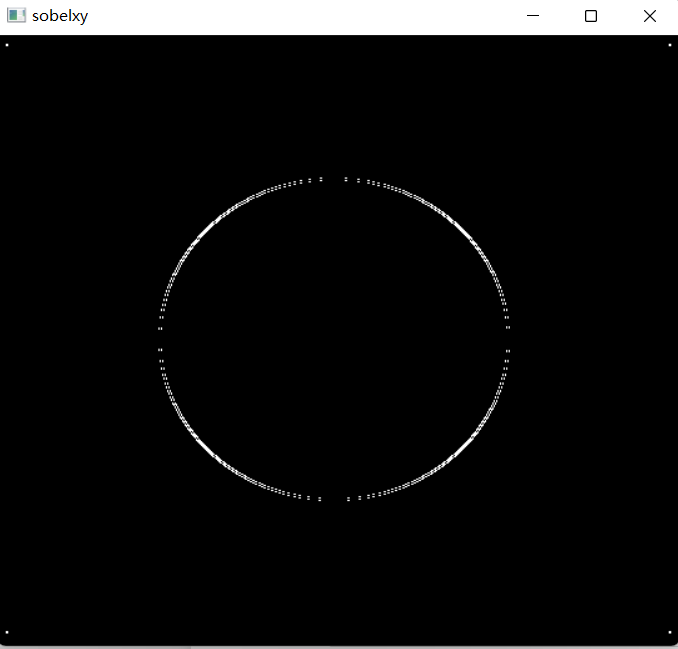

## 1.2 人照处理(获取图片边缘的实际例子)

In [12]:
img = cv2.imread('01_Picture/07_Lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show('img',img)

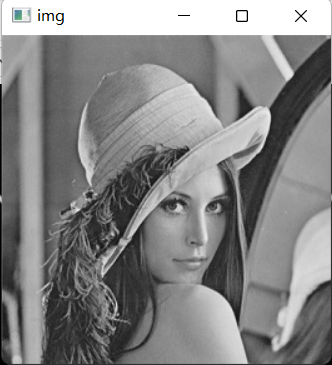

In [14]:
img = cv2.imread('01_Picture/07_Lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show('sobelxy',sobelxy)

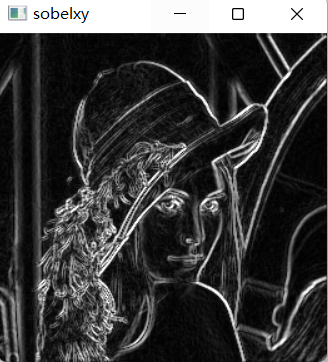

In [16]:
# 整体计算有重影和模糊，不建议整体计算
img = cv2.imread('01_Picture/07_Lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelxy = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy)
cv_show('sobelxy',sobelxy)

整体直接计算 不如 分开计算然后再图像融合 的效果好
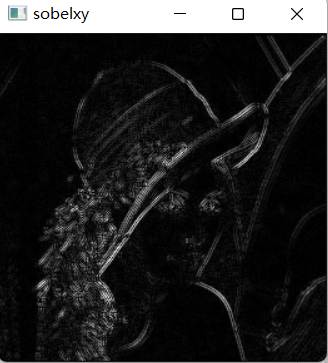

# 2. Scharr算子

① 对结果的差异**更敏感**一些，描述的**边缘更加细致**（相对于sobel算子的矩阵来说，数值绝对值更大）。

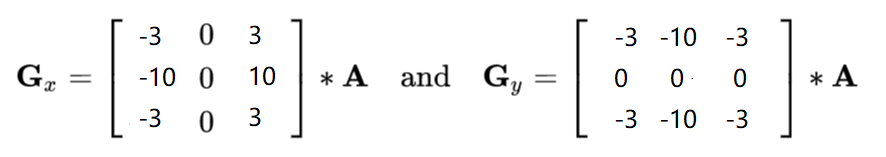

# 3. Laplacian算子

① Laplacian算子用的是**二阶导**，**对噪音点更敏感一些**。

② 如果**中心点是边界**，它**与周围像素点差异的幅度会较大**，Laplacian算子根据此特点可以把边界识别出来。

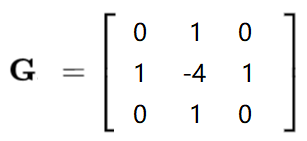

# 4. 各个算子区别

In [20]:
img = cv2.imread('01_Picture/07_Lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show('img',img)

原始图像
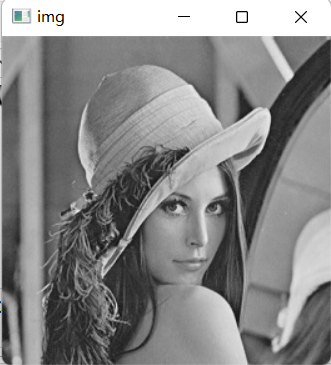

In [22]:
# 不同算子的差异
img = cv2.imread('01_Picture/07_Lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)   

scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx,0.5,scharry,0.5,0)

laplacian = cv2.Laplacian(img,cv2.CV_64F) # 没有 x、y，因为是求周围点的比较
laplacian = cv2.convertScaleAbs(laplacian)

res = np.hstack((sobelxy,scharrxy,laplacian))
cv_show('res',res)

三种算子进行对比
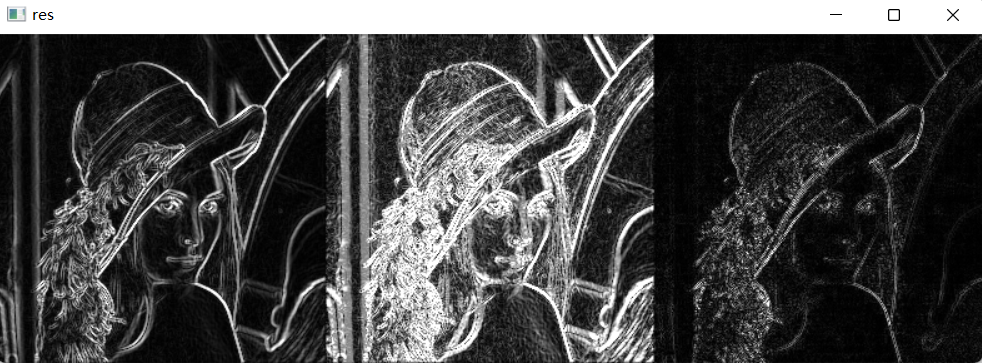